In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gensim

In [3]:
gensim.__version__

'3.6.0'

In [4]:
np.random.seed(42)

In [7]:
from gensim.models.word2vec import Word2Vec

# Using pre-trained word_vector

In [8]:
# gensim has an api that we can download that has trained on huge data
import gensim.downloader as api

In [10]:
print(gensim.downloader.info()["models"].keys())

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])


In [11]:
wv = api.load("word2vec-google-news-300")
# this acts like a lookUp or dictionary i.e., when we pass any word it will retain a vector representation of that word
     

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [15]:
#wv["apple"]

In [17]:
len(wv["apple"])

300

In [18]:
# Checking few methods avaibale
wv.similarity("apple","mango")

0.57518554

In [19]:
wv.similarity("apple","minivan")

0.16333823

In [25]:
# Checking similarity pairwise

pairs = [
    ("car","minivan"),
    ("car","cereal"),
    ("car", "communism"),
    ("car","banana")
]

In [27]:
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'cereal'	0.14
'car'	'communism'	0.06
'car'	'banana'	0.11


In [31]:
# top 5 most_similar words
print(wv.most_similar(positive = ["car", "minivan"])[:5])

[('SUV', 0.853219211101532), ('vehicle', 0.8175784349441528), ('pickup_truck', 0.7763689160346985), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.756571888923645)]


In [35]:
print(wv.most_similar(positive = ["apple", "cereal"])[:5])

[('potato', 0.6626662015914917), ('breakfast_cereal', 0.6482193470001221), ('apples', 0.6319440603256226), ('cereals', 0.6317809820175171), ('pear', 0.6248050332069397)]


In [40]:
print(wv.doesnt_match(["apple", "mango", "cereals", "strawberry", "orange"]))

cereals


Semantic regularities captured in word embeddings

In [41]:
print(wv.most_similar(positive = ["woman","king"], negative = ["man"])[:5])

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133)]


In [42]:
print(wv.most_similar(positive = ["woman", "king"])[:3])

[('man', 0.6628609895706177), ('queen', 0.6438563466072083), ('girl', 0.6136074662208557)]


#Visualizing Word_Vector

In [48]:
words = ["man", "woman", "car", "one", "two"]

In [49]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA          # we use PCA as dimesionality reduction technique
pca = PCA(n_components=2)      # we reduce 300 dimension to only 2
result = pca.fit_transform(sample_vectors)
result

array([[ 1.1738676 , -0.27518362],
       [ 1.5939608 , -0.01600524],
       [-0.718368  ,  1.9807584 ],
       [-0.8602772 , -0.722861  ],
       [-1.1891832 , -0.96670866]], dtype=float32)

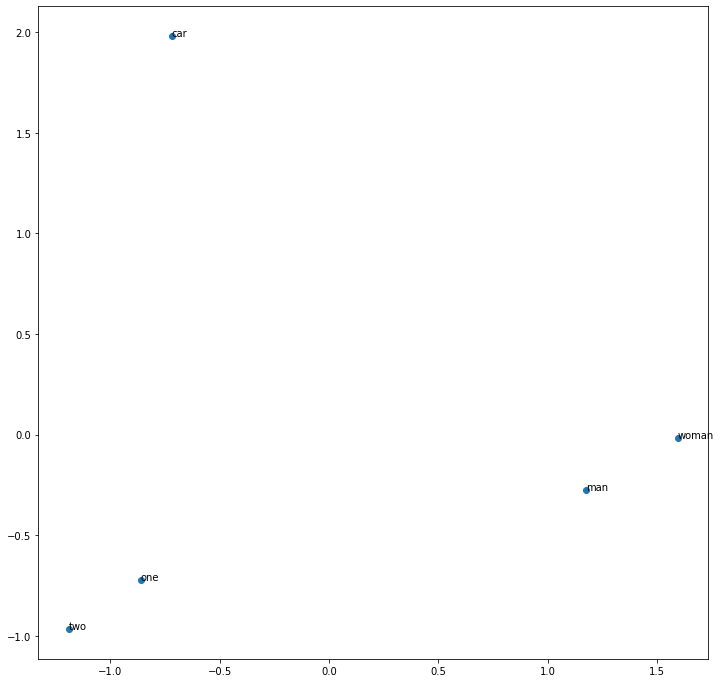

In [50]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

Here, we can see that even in 2 dimenion, vector_represenation has similar semantic in respect to the real real-world scenerio.

# Building Classification Models using this vector representation model

In [52]:

df = pd.read_csv("/content/train.csv")

In [53]:
df.head()

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


In [54]:
df = df[["comment_text", "toxic"]]

In [80]:
df.isna().sum()

comment_text    0
toxic           1
tokens          0
vec             0
dtype: int64

In [81]:
df = df.dropna()

In [84]:
df["comment_text"].str.isspace().sum()

3

In [85]:
df = df[~ df["comment_text"].str.isspace() == True]

# Clearing stop_words and punctuations

In [55]:
import string
import spacy

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [59]:
# our stop_words list from spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'should', 'ca', 'as', 'go', 'among', 'twelve', 'toward', 'put', 'with', 'above', 'few', 'bottom', 'eleven', 'then', 'hereupon', "'m", 'six', 'rather', 'wherever', 'within', '’m', 'move', 'both', 'could', 'might', 'none', 'why', 'on', '‘ve', 'often', 'against', 'top', 'which', 'amount', 'thence', 'upon', 'together', 'thereby', 'him', 'others', 'yours', 'anywhere', 'no', 'thereupon', 'former', 'becomes', 'less', 'itself', 'nobody', 'once', '’re', 'if', 'perhaps', 'before', 'anything', 'or', 'the', 'much', 'beyond', 'made', 'twenty', 'without', 'several', 'three', 'onto', 'call', 'was', 'whence', 'almost', '‘ll', 'they', 'here', 'who', 'done', 'whereby', 'four', 'enough', 'throughout', 'otherwise', 'how', 'must', 'else', 'something', 'what', 'mostly', 'further', 'everyone', 'out', 'whereafter', 'least', 'still', 'after', 'again', 'she', 'were', 'into', 'am', 'two', 'and', 'everywhere', 'nowhere', 'has', 'those', 'around', 'can', 'sometimes', '‘d', 'please', 'themselves', 'i', 'doing', 'e

In [61]:
# Similarly for the punctuations from spacy
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [66]:
def spacy_tokenizer(sentence):
  doc = nlp(sentence)

  # Lemmatizing each token and converting each token into lowercase
  my_tokens = [word.lemma_.lower().strip() for word in doc]

  mytokens = [word for word in my_tokens if word not in stop_words and word not in punctuations]

  return mytokens


In [67]:
#trail
spacy_tokenizer("I love apples!")

['love', 'apple']

In [86]:
df["tokens"] = df["comment_text"].apply(spacy_tokenizer)

In [87]:
df.head(3)

,comment_text,toxic,tokens,vec
0,explanation why the edits made under my userna...,0.0,"[explanation, edit, username, hardcore, metall...","[-0.044472914475661054, 0.06138962965745192, -..."
1,d aww he matches this background colour i m s...,0.0,"[d, aww, match, background, colour, m, seeming...","[-0.033679962158203125, 0.015431722005208334, ..."
2,hey man i m really not trying to edit war it...,0.0,"[hey, man, m, try, edit, war, s, guy, constant...","[0.00825777920809659, 0.05512584339488636, -0...."


# Using Average Approach
* because lengths of our sentences may vary
* all sentences should have the same length

In [88]:
def sent_vec(sent):
  vector_size = wv.vector_size # attribute of wv
  wv_res = np.zeros(vector_size) # 300 dimensional vetor of zeros
  #print(wv_res)
  ctr = 1
  for w in sent:            # for whatever tokens we have
    if w in wv:             # checking if our work is present in word2vec 
      ctr += 1
      wv_res += wv[w]       # we add vector_representation to zero vector
# We will have all the vectors associated with each word of the sentence in "wv_res"
  
  wv_res = wv_res/ctr # we divide the "wv_res" by number of words
  return wv_res

In [89]:
# preforming functions on the newly created "tokens"
df["vec"] = df["tokens"].apply(sent_vec)

In [90]:
df.head(3)

,comment_text,toxic,tokens,vec
0,explanation why the edits made under my userna...,0.0,"[explanation, edit, username, hardcore, metall...","[-0.044472914475661054, 0.06138962965745192, -..."
1,d aww he matches this background colour i m s...,0.0,"[d, aww, match, background, colour, m, seeming...","[-0.033679962158203125, 0.015431722005208334, ..."
2,hey man i m really not trying to edit war it...,0.0,"[hey, man, m, try, edit, war, s, guy, constant...","[0.00825777920809659, 0.05512584339488636, -0...."


# train_test_splitting

In [91]:
X = list(df["vec"])
y = list(df["toxic"])

In [77]:
#X[0]

In [78]:
from sklearn.model_selection import train_test_split  

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

# Training Models and Evaluating

In [94]:
from sklearn.metrics import classification_report

In [102]:
def report(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

In [93]:
from sklearn.linear_model import LogisticRegression

In [100]:
log_model = LogisticRegression(max_iter=1000)

In [96]:
from sklearn.svm import LinearSVC, SVC

In [97]:
rbf_svc = SVC()

In [98]:
svc = LinearSVC()

In [103]:
report(log_model)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8328
         1.0       0.84      0.60      0.70       909

    accuracy                           0.95      9237
   macro avg       0.90      0.79      0.84      9237
weighted avg       0.95      0.95      0.95      9237



In [104]:
report(svc)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8328
         1.0       0.84      0.60      0.70       909

    accuracy                           0.95      9237
   macro avg       0.90      0.79      0.84      9237
weighted avg       0.95      0.95      0.95      9237



In [105]:
report(rbf_svc)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      8328
         1.0       0.88      0.62      0.73       909

    accuracy                           0.95      9237
   macro avg       0.92      0.81      0.85      9237
weighted avg       0.95      0.95      0.95      9237

